In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [169]:
df = pd.read_csv('https://raw.githubusercontent.com/Livanty/DatasetW2/refs/heads/main/adult.csv', na_values=["?"]) #Membaca file data csv dan merubah data yang ? menjadi NaN
df.head() #Menunjukan 5 data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [170]:
df.info() #digunakan untuk menampilkan ringkasan informasi tentang struktur DataFrame, termasuk jumlah baris, kolom, tipe data, nilai non-null, dan penggunaan memori.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [171]:
# untuk mengganti missing value dengan modus (nilai yang paling sering muncul) karena modus mewakili nilai umum pada kolom tersebut.
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [172]:
print(df.isnull().sum()) #untuk mengecek apakah masih ada nilai null pada data

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [173]:
df.describe() #digunakan untuk menghasilkan statistik deskriptif (seperti mean, median, standar deviasi, dan quartiles) untuk kolom numerik dalam DataFrame.

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [174]:
# untuk mengetahui jumlah / frekuensi kemunculan setiap nilai unik di setiap kolom dalam dataframe
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship',
           'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

for col in columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for age:
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


Value counts for workclass:
workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


Value counts for fnlwgt:
fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: count, Length: 28523, dtype: int64


Value counts for education:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         5

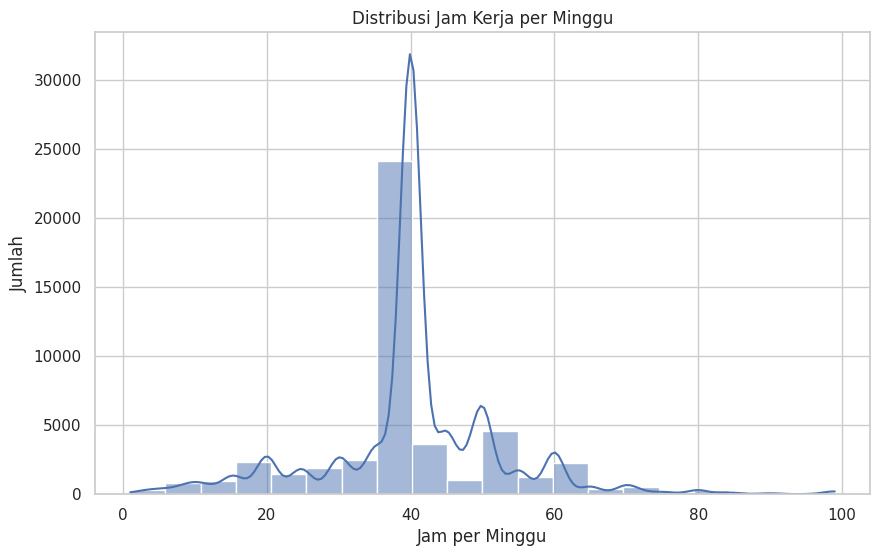

In [175]:
# visualisasi persebaran jam kerja per minggu
plt.figure(figsize=(10, 6))
sns.histplot(df['hours-per-week'], bins=20, kde=True)
plt.title('Distribusi Jam Kerja per Minggu')
plt.xlabel('Jam per Minggu')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi ini menunjukkan sebaran dan kepadatan data dalam suatu rentang jam kerja yang dimana ini memberikan gambaran jumlah pekerja pada berbagai interval jam kerja per minggu.
# Dari visualisasi ini, terlihat puncak tertinggi di sekitar 40 jam per minggu, menunjukkan bahwa sebagian besar pekerja bekerja sekitar 40 jam per minggu.
# Ada beberapa pekerja yang bekerja lebih dari 40 jam, namun jumlahnya berkurang signifikan di interval yang lebih tinggi, seperti 60 jam dan seterusnya.

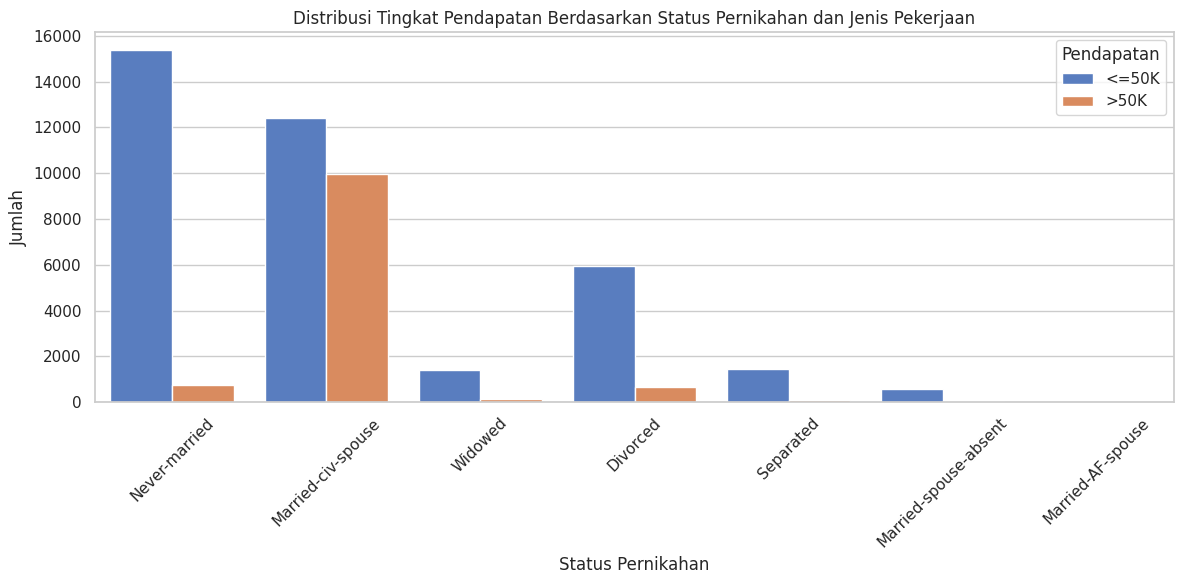

In [176]:
# Mengatur ukuran dan gaya plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Membuat plot
sns.countplot(data=df, x="marital-status", hue="income", palette="muted", dodge=True)

# Memberi label dan judul
plt.xlabel("Status Pernikahan")
plt.ylabel("Jumlah")
plt.title("Distribusi Tingkat Pendapatan Berdasarkan Status Pernikahan dan Jenis Pekerjaan")
plt.legend(title="Pendapatan")
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan plot
plt.show()

# Visualisasi ini membandingkan distribusi pendapatan di setiap kategori status pernikahan. Dari grafik ini, kita bisa melihat bahwa mayoritas individu dalam status "Never-married" dan "Divorced" memiliki pendapatan di bawah 50K.
# Sementara itu, kategori "Married-civ-spouse" memiliki distribusi yang lebih seimbang antara pendapatan di atas dan di bawah 50K.

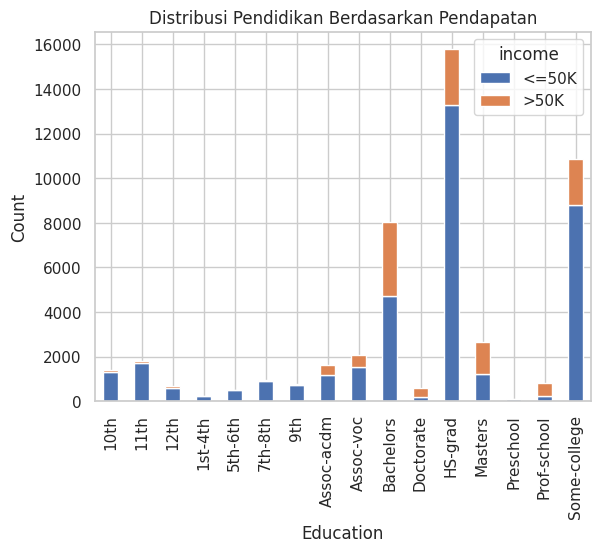

In [177]:
#untuk pendidikan dan income
edu_income = pd.crosstab(df['education'], df['income'])
edu_income.plot(kind="bar", stacked=True)
plt.title("Distribusi Pendidikan Berdasarkan Pendapatan")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

# Visualisasi ini menunjukkan perbandingan pendapatan di setiap tingkat pendidikan, dengan jelas menggambarkan bagaimana distribusi pendapatan berubah seiring dengan tingkat pendidikan.
# Dari grafik ini, terlihat bahwa mayoritas individu dengan pendidikan "HS-grad" atau setara memiliki pendapatan di bawah 50K, sementara individu dengan tingkat pendidikan yang lebih tinggi, seperti "Bachelors" dan "Masters," memiliki persentase pendapatan di atas 50K yang lebih banyak atau bisa dikatakan setara dengan yang dibawah 50K.
# Hal ini menunjukkan bahwa tingkat pendidikan berperan penting dalam mempengaruhi potensi pendapatan seseorang.


In [178]:
# untuk mengubah kolom kategorikal (workclass, education, dll) menjadi numerik
label_encoder = LabelEncoder()

# untuk identifikasi dan memilih semua kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns

# untuk mengonversi setiap kolom kategorikal ke numerik
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# untuk menampilkan 10 data random
df.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
28990,50,0,221532,7,12,2,2,0,4,1,0,0,40,38,1
36523,48,3,212120,11,9,2,6,0,4,1,0,0,40,38,1
39556,20,3,380544,7,12,4,13,3,4,1,0,0,20,38,0
45416,24,3,142528,15,10,4,11,3,4,1,0,0,20,38,0
18287,57,3,185072,15,10,4,0,2,2,0,0,0,40,22,0
3541,44,5,92162,11,9,0,2,1,4,1,0,0,40,38,0
30082,39,5,103110,9,13,2,9,0,4,1,0,0,50,38,0
13761,29,3,57617,15,10,4,7,1,4,0,0,0,34,38,0
28200,44,3,257758,10,16,2,9,0,4,1,0,0,40,38,1
5436,42,1,150533,12,14,2,10,0,4,1,7688,0,35,38,1


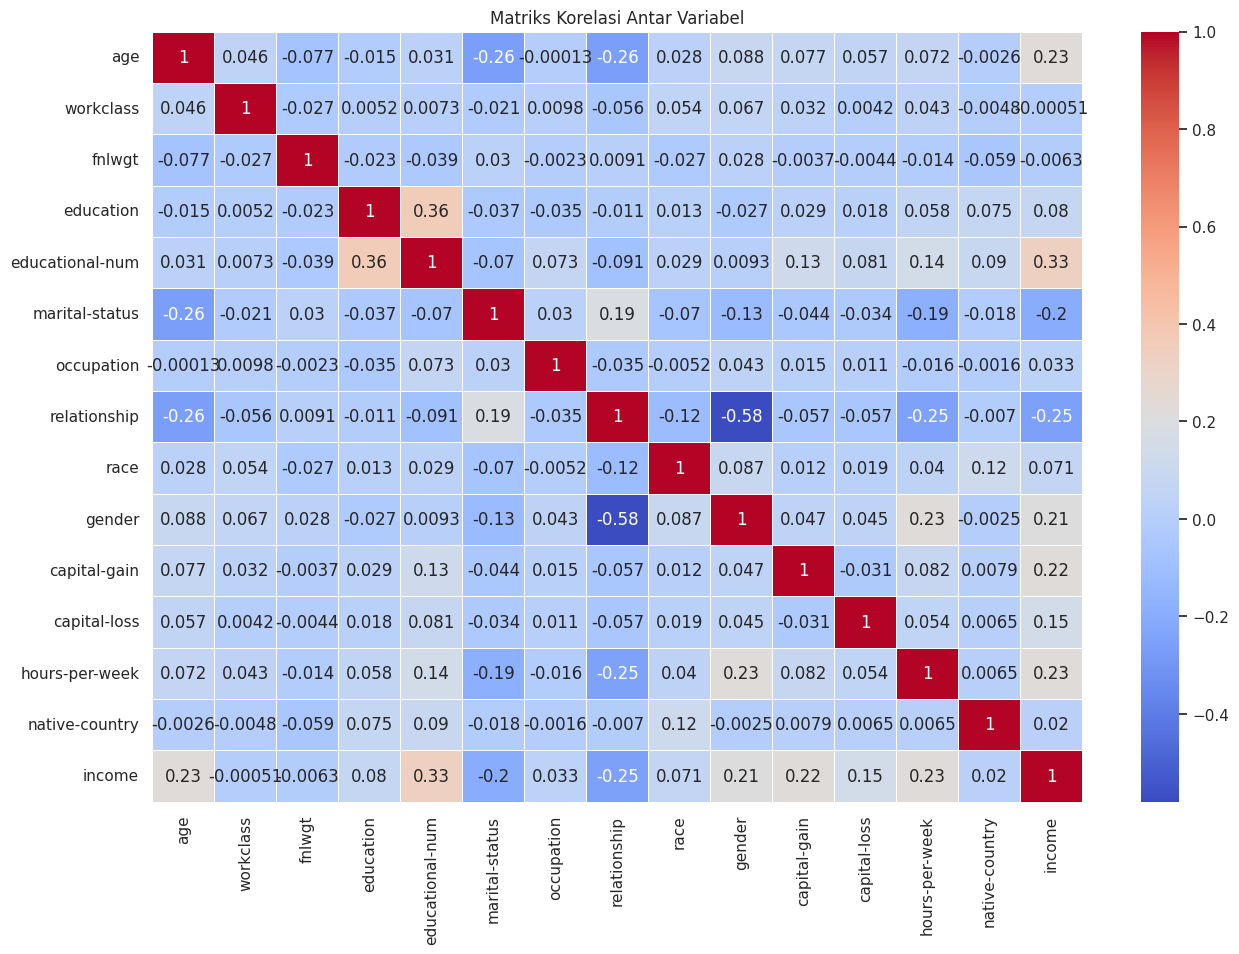

In [179]:
# Menghitung korelasi
corr_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Menambahkan judul
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

# Variabel dengan korelasi tertinggi terhadap income adalah educational-num (0.33), yang menunjukkan bahwa tingkat pendidikan memiliki pengaruh positif yang signifikan terhadap pendapatan.
# Selain itu, age (0.24), hours-per-week (0.23), capital-gain (0.22), dan gender (0.22) juga memiliki korelasi positif yang cukup tinggi terhadap income, meskipun tidak sekuat educational-num.
# Variabel seperti relationship (-0.25) dan marital-status (-0.19) memiliki korelasi negatif dengan income.

In [180]:
X = df.drop(['income'], axis = 1) #Membuat variabel X yang berisi semua kolom dari DataFrame df, kecuali kolom species.
y = df['income'] #Membuat variabel y yang berisi kolom species dari DataFrame df.

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) #untuk membagi dataset menjadi dua bagian: satu untuk pelatihan (training 80%) dan satu untuk pengujian (testing 20%).

In [182]:
X_train.shape, X_test.shape # untuk menunjukkan jumlah baris dan kolom

((39073, 14), (9769, 14))

Decision Tree

In [183]:
#Criterion Entropy
#a
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [184]:
#b
y_pred_en = clf_en.predict(X_test) #untuk mendapatkan hasil prediksi tentang outcome penguin dari data pengujian

In [185]:
#c
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en))) #print hasil akurasi

Model accuracy score with criterion entropy: 0.8449


In [186]:
#d
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8384
Test set score: 0.8449


[Text(0.5, 0.875, 'x[7] <= 0.5\nentropy = 0.796\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\nentropy = 0.992\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\nentropy = 0.918\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'entropy = 0.882\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'entropy = 0.124\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\nentropy = 0.854\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'entropy = 0.914\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'entropy = 0.027\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\nentropy = 0.463\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\nentropy = 0.398\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'entropy = 0.287\nsamples = 20994\nvalue = [1994

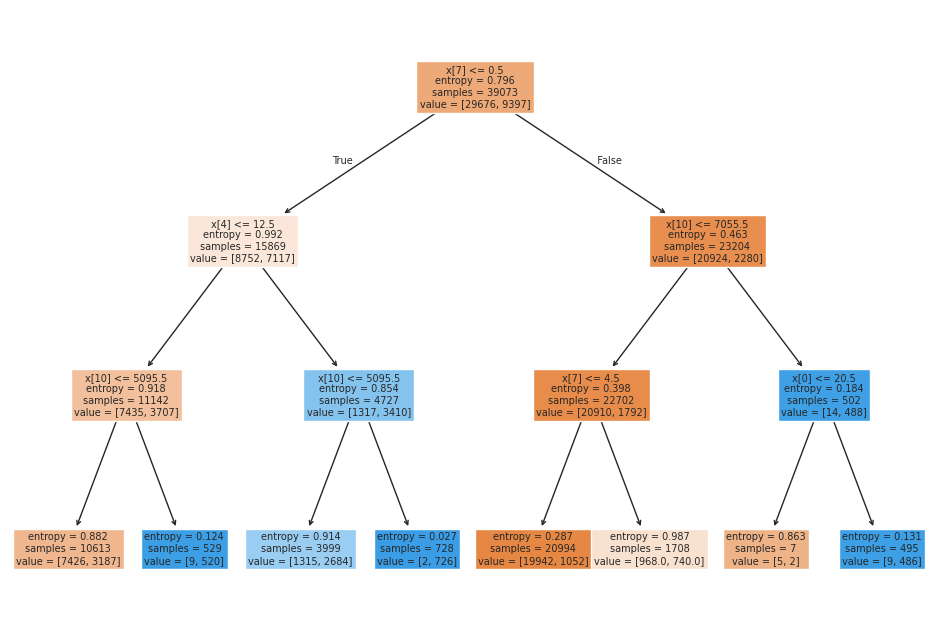

In [187]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train), filled=True) #Membuat tree yang ada warnanya


In [188]:
#a

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [189]:
#b
y_pred_gini = clf_gini.predict(X_test)  #untuk mendapatkan hasil prediksi tentang spesies penguin dari data pengujian menggunakan gini

In [190]:
#c
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini))) #Untuk print hasil akurasi

Model accuracy score with criterion gini: 0.8449


In [191]:
#d
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8384
Test set score: 0.8449


[Text(0.5, 0.875, 'x[7] <= 0.5\ngini = 0.365\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\ngini = 0.495\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\ngini = 0.444\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'gini = 0.42\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'gini = 0.033\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\ngini = 0.402\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'gini = 0.441\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'gini = 0.005\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\ngini = 0.177\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\ngini = 0.145\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'gini = 0.095\nsamples = 20994\nvalue = [19942, 1052]'),
 Text(0.6875, 0.125, '

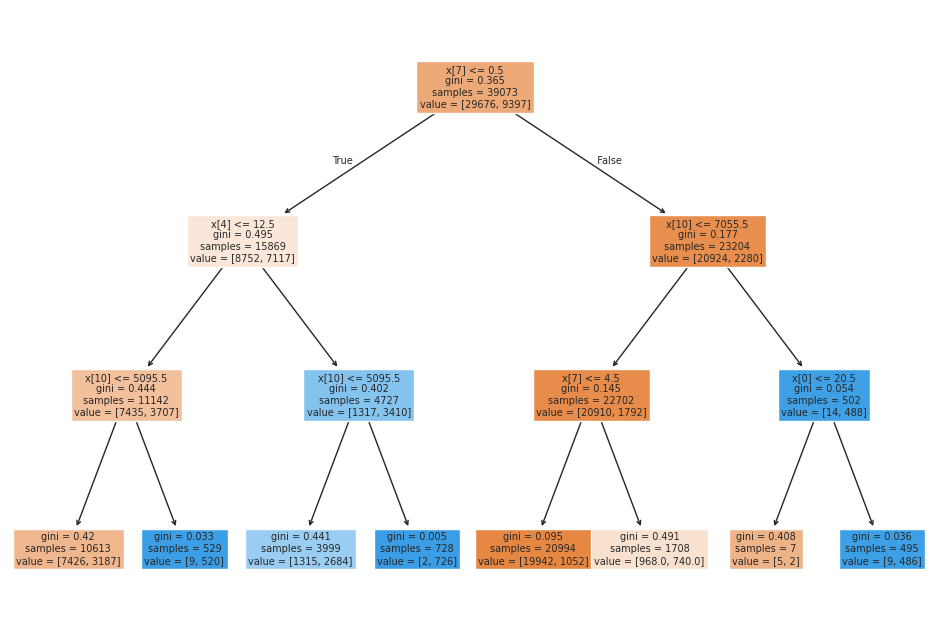

In [192]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled=True) #membuat dan menujukan tree


In [193]:
#f
cm = confusion_matrix(y_test, y_pred_en) #Untuk membuat confusion matrix
print("Confusion Matrix:\n", cm)

cm = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[7136  343]
 [1172 1118]]
Confusion Matrix:
 [[7136  343]
 [1172 1118]]


In [194]:
#g
print(classification_report(y_test, y_pred_en)) #untuk membuat dan print classificaton report
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



In [195]:
#h
# Kedua model menunjukkan performa yang cukup baik dalam mengklasifikasikan pendapatan berdasarkan kolom yang ada, baik untuk train set dan test set.
# Model accuracy score with criterion entropy: 0.8449
# Model accuracy score with criterion gini: 0.8449
# Jika kita melihat nilai accuracy dari kedua model ini menghasilkan angka yang sama dan seimbang

Naive Bayes

In [196]:
#a
nb_classifier = GaussianNB() # untuk menginstansiasi objek Gaussian Naive Bayes dari pustaka scikit-learn.
nb_classifier.fit(X_train, y_train) # untuk melatih model Naive Bayes yang telah dibuat (nb_classifier) dengan data fitur X_train dan label y_train.

GaussianNB()

In [197]:
#b
nb_y_pred = nb_classifier.predict(X_test) # untuk memprediksi label (target) menggunakan model Naive Bayes yang telah dilatih sebelumnya (nb_classifier).

In [198]:
#c
cm = confusion_matrix(y_test, nb_y_pred) #Untuk membuat confussion matrix dari nb
print("Confusion Matrix:\n", cm)

#d
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred))) #Untuk menujukan hasil akurasi

Confusion Matrix:
 [[7099  380]
 [1580  710]]
Accuracy Score: 0.7994


In [199]:
#e
print(classification_report(y_test, nb_y_pred)) #Untuk print classification report

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



In [200]:
# f
# Accuracy Score: 0.7994
# Jika kita melihat accuracy score yang dimiliki oleh naive ini cukup bagus dalam bekerja dengan dataet pendapatan ini, namun jika dibandingkan dengan decision tree masih lebih baik decision tree untuk dtaset ini.

Logistic regresion

In [201]:
# Menggunakan Metode Logistic regresion
# a define the model
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)  # membuat model logisticc regresion


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [202]:
# b
y_pred_log = classifier.predict(X_test) # membuat prediksi
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})
comparison_table.head() # menampilkan 5 baris pertama dari DataFrame

,y_test,y_pred
7762,0,0
23881,0,0
30507,1,1
28911,0,0
19484,0,0


In [203]:
#c
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log))) # print hasil accuracy score

Accuracy Score: 0.7985


In [204]:
# d
cmatrix = confusion_matrix(y_test, y_pred_log)  #untuk membuat matrix
print("Confusion Matrix:\n", cmatrix)

Confusion Matrix:
 [[7107  372]
 [1596  694]]


In [205]:
# e
print (classification_report (y_test, y_pred_log)) # print hasil classification report

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.30      0.41      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



In [206]:
# f
# Accuracy Score: 0.7985, Akurasi yang dimiliki oleh logistic regresion ini bisa dikatakan baik, namun jika dibandingkan dengan akurasi model lainnya model logistic regresion ini memiliki akurasi paling kecil.
# Dari ketiga data ini Model accuracy score with criterion gini: 0.8449, Model accuracy score with criterion entropy:0.8449, Model Naive Bayes: 0.7994, Model Logistic Regresion: 0.7985
# Sehingga untuk prediksi pendapatan ini lebih disarankan menggunakan 1. Entropi atau Gini 2. Naive  4. Logistic Regresion
